___
# Ciência dos Dados - PROJETO 1

## Carla Kim Gaieski
___

## As televisões nas moradias brasileiras

___
## Introdução
É fato que no Brasil existe uma má divisão da concentração de renda, que se encontra centralizado nos grandes centros urbanos. No entanto, o brasileiro, em geral, possui a tendência de usar seu dinheiro em bens materiais, mais do que em bens não duráveis e até mesmo em moradias. Por isso, nem sempre a pessoa que possui uma moradia alugada/ possui uma TV "vintage" (mais antiga), nem aquele que possui um casa própria possui a melhro televisão existente no mercado. Por isso, torna-se interessante analisar se há uma relação entre esses fatores.
O tipo da televisão, tubo ou fina, está interligado com a situação censitária, junto com a espécie de domicílio?
A situação censitária junto com a espécie de domicílio interfere na qualidade,tubo ou fina, da televisão da residência?



___
## Análise e Resultados

In [149]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Criando meu Data Frame, com os dados de 2015, já com as varáveis filtradas e com seus respectivos títulos

In [150]:
dados = pd.read_csv('DOM2015.csv', sep=',')

df = pd.DataFrame({'Situação censitária' : dados.V4105,'Espécie de domicílios': dados.V0201,
                   'N de TV tela fina': dados.V02270, 'N TV tela tubo': dados.V02272,
                   'Rendimento mensal domiciliar per capta(R$)':dados.V4621})

df.to_csv('Projeto1CD.csv')

Mudando as variáveis qualitativas(colunas: "Situacao censitaria","Espécie de domicílios","TV para acessar internet") para categorias. Além de mudar os números pelo equivalente em texto

In [151]:
df['Situação censitária']= df['Situação censitária'].astype('category')
df['Situação censitária'].cat.categories = ('URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada',
                              'URBANA - Área urbana isolada', 'RURAL - Aglomerado rural de extensão urbana', 
                              'RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo',
                              'RURAL - Aglomerado rural, isolado, outros aglomerados',
                              'RURAL - Zona rural exclusive aglomerado rural ')

df['Espécie de domicílios']= df['Espécie de domicílios'].astype('category')
df['Espécie de domicílios'].cat.categories = ('Particular permanente', 'Particular improvisado',
                              'Coletivo')

df.dropna().head()

,Espécie de domicílios,N TV tela tubo,N de TV tela fina,Rendimento mensal domiciliar per capta(R$),Situação censitária
0,Particular permanente,3.0,1.0,800.0,"URBANA - Cidade ou vila, área urbanizada"
3,Particular permanente,3.0,1.0,793.0,"URBANA - Cidade ou vila, área urbanizada"
5,Particular permanente,3.0,0.0,1990.0,"URBANA - Cidade ou vila, área urbanizada"
6,Particular permanente,3.0,0.0,350.0,"URBANA - Cidade ou vila, área urbanizada"
7,Particular permanente,3.0,0.0,1333.0,"URBANA - Cidade ou vila, área urbanizada"


CONATANDO AS VARIÁVEIS - frequência relativa em percentual

In [152]:
df['Situação censitária'].value_counts(True)*100
#dessa informação já pode-se concluir que a maioria da população brasileira vive na zona urbana em cidade ou vila, área urbanizada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

URBANA - Cidade ou vila, área urbanizada                 82.757343
RURAL - Zona rural exclusive aglomerado rural            12.287270
RURAL - Aglomerado rural, isolado, povoado                2.088115
URBANA - Cidade ou vila, área não urbanizada              1.545747
URBANA - Área urbana isolada                              0.725582
RURAL - Aglomerado rural de extensão urbana               0.410083
RURAL - Aglomerado rural, isolado, outros aglomerados     0.123025
RURAL - Aglomerado rural, isolado, núcleo                 0.062835
Name: Situação censitária, dtype: float64

In [153]:
df['Espécie de domicílios'].value_counts(True)*100
#conclui-se que quase todos os brasileiros vivem em alguma moradia particular permanente, o que indica a existência de um poder aquisitivo

Particular permanente     99.713411
Particular improvisado     0.202647
Coletivo                   0.083942
Name: Espécie de domicílios, dtype: float64

CRUZANDO DUAS VARIÁVEIS - CROSSTAB

Crosstab da espécie de domicílios com a situação sencitáira e gráfico

In [154]:
ct = pd.crosstab(df['Situação censitária'], df['Espécie de domicílios'],normalize=True)
soma_tabela = ct.sum().sum()
ct*100/soma_tabela

Espécie de domicílios,Particular permanente,Particular improvisado,Coletivo
Situação censitária,,,
"URBANA - Cidade ou vila, área urbanizada",83.864540,0.176362,0.079702
"URBANA - Cidade ou vila, área não urbanizada",1.517734,0.004239,0.000848
URBANA - Área urbana isolada,0.583352,0.000000,0.000848
RURAL - Aglomerado rural de extensão urbana,0.395120,0.000000,0.000000
"RURAL - Aglomerado rural, isolado, povoado",2.119740,0.000000,0.000000
"RURAL - Aglomerado rural, isolado, núcleo",0.058505,0.000000,0.000848
"RURAL - Aglomerado rural, isolado, outros aglomerados",0.120401,0.000848,0.000000
RURAL - Zona rural exclusive aglomerado rural,11.054019,0.021197,0.001696


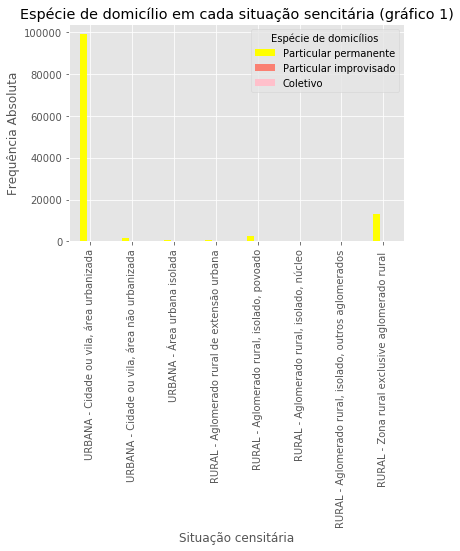

In [155]:
matplotlib.style.use('ggplot')

ct1 = pd.crosstab(df['Situação censitária'], df['Espécie de domicílios'])
ct1.plot(kind='bar', color=('yellow', 'salmon','pink'))
plt.ylabel('Frequência Absoluta')
plt.title('Espécie de domicílio em cada situação sencitária (gráfico 1)')

Esse gráfico demonstra o que os dados anteriores indiavam: a predominância de um domicílio particular na área urbana, cidade ou vila, urbanizada

Crosstab da situação sencitária com o rendimento mensal domiciliar e gráfico

In [156]:
ct4 = pd.crosstab(df['Rendimento mensal domiciliar per capta(R$)'],df['Situação censitária'])
# conclui-se que a renda está concentra na zona urbana, cidade o vila urbanizada

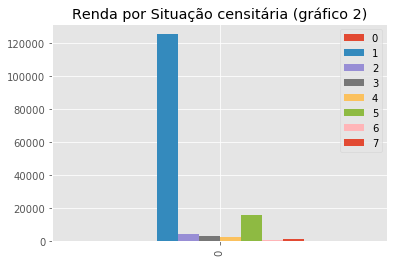

In [157]:
#renda em cada região (situação sencitária)
o=[0]*8
for i in range(8):
    ddados2 = dados[ (dados.V4105 ==i)]
    o[i] = (i,[ddados2.V4105.sum()])
    
    
df2 = pd.DataFrame.from_items(o)

df2.plot(kind='bar',title='Renda por Situação censitária (gráfico 2)')

Esse gráfico acima mostra exatamente que o rendimento mensal domiciliar per capta está concentrado na regiao urbana, cidade ou vila,
urbaniazda. Então a população da região possui maior poder aquisitivo, do que as demais regiões.

Crosstab da situação sencitária com o número de TV de tela fina e gráfico

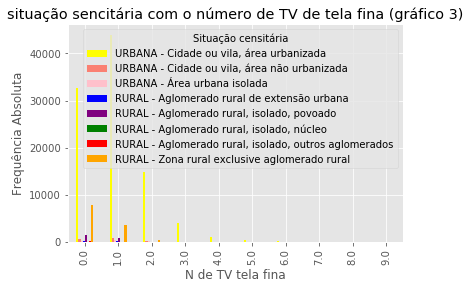

In [158]:
ct3 = pd.crosstab(df['N de TV tela fina'],df['Situação censitária'])
ct3.plot(kind='bar', color=('yellow', 'salmon','pink','blue','purple','green','red','orange'), title="situação sencitária com o número de TV de tela fina (gráfico 3)")
plt.ylabel('Frequência Absoluta')

O gráfico acima mostra que a maioria das residências na região Urbana, cidade ou vila, urbanizada, não possui tv de tela fina, mas que as que possuem, variam entre 1 e 2 televisões. 

Crosstab da situação sencitária com o número de TV de tela tubo e gráfico

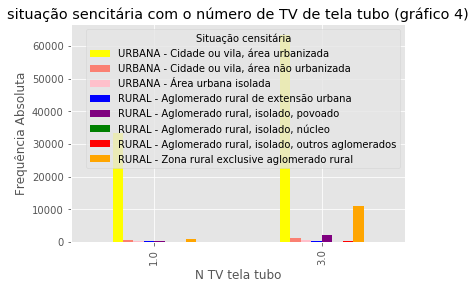

In [159]:
ct4 = pd.crosstab(df['N TV tela tubo'],df['Situação censitária'])
ct4.plot(kind='bar', color=('yellow', 'salmon','pink','blue','purple','green','red','orange'), title='situação sencitária com o número de TV de tela tubo (gráfico 4)')
plt.ylabel('Frequência Absoluta')

O gráfico acima mostra que a maioria das residências na região Urbana, cidade ou vila, urbanizada, possui 3 televisões de tubo.

VARIÁVEIS QUANTITATIVAS - renda mensal

In [160]:
faixa = range(10,500,50)
print('Frequências absoluta:')
RENDA_cat = pd.cut(df['Rendimento mensal domiciliar per capta(R$)'], bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100

Frequências absoluta:


(10, 60]       4.177356
(60, 110]      6.182106
(110, 160]     7.613618
(160, 210]    10.596991
(210, 260]    11.113222
(260, 310]    16.250198
(310, 360]    11.721298
(360, 410]    20.516231
(410, 460]    11.828979
Name: Rendimento mensal domiciliar per capta(R$), dtype: float64

In [161]:
# Tabelas univariada
rendaAcat = pd.cut(df['Rendimento mensal domiciliar per capta(R$)'], faixa, right=False)
print('Frequências relativas:')
ut1 = (rendaAcat.value_counts(normalize=True)*100).round(decimals=1).reindex(faixa).dropna()
print(ut1,'\n')

Frequências relativas:
[10, 60)       4.0
[60, 110)      6.3
[110, 160)     7.4
[160, 210)    10.8
[210, 260)    11.0
[260, 310)    16.4
[310, 360)    11.6
[360, 410)    20.7
[410, 460)    11.8
Name: Rendimento mensal domiciliar per capta(R$), dtype: float64 



Histograma com as frequências absolutas da renda mensal

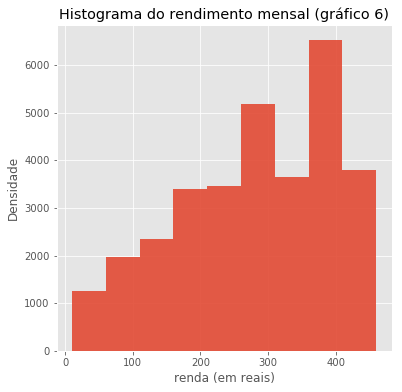

In [162]:
plot = df['Rendimento mensal domiciliar per capta(R$)'].plot.hist(bins=faixa,title='Histograma do rendimento mensal (gráfico 6)', figsize=(6,6), alpha=0.9)
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

___
## Conclusão 

A partir dos gráficos feitos e das análises feitas ao longo do código, pode-se concluir que o rendimento mensal domiciliar per capta se concentra na zona urbana, cidade ou vila, urbanizada (gráfico 2). Dessa forma, também pode-se observar que nessa mesma zona as televisões mais utilizadas ainda continuam sendo as de tubo (gráfico 4) do que as de tela fina (gráfico 3).
Agora vendo a zona no outro extremo, rural exclusive aglomerado rural, que possui certo rendimento mensal domiciliar per capta, porém bem baixo, tem capital sufuciente para adquirir televisões de tela fina e tubo em domicílios, como a segunda colocada no gráfico 3 e 4. 
Em ambos só há moradia privada e própria.
A diferença entre ambas as zonas é claramente visível. Assim, pode-se inferir que, realmente, o poder aquisitivo por domicílio não define a qualidade dos aparatos domésticos. Ou seja, uma alta renda, com moradia própia e privada não levam à televisões finas, novas. Em seu luar à as de tubo. O mesmo vale para as baixas rendas. 
